<a href="https://colab.research.google.com/github/jruzekow/osw-analysis/blob/main/NOTEBOOK_2_non_winter_OSW_reliability_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2 for ISONE (non-winter) OSW Analysis
Building on notebook 1, this notebook is designed to perform similar analysis with non-winter months. It is largely the same as notebook 1 in this series, except it selects non-winter months. **Part 4** is the only section that changes to select non-winter months, March-November.

**Part 1:**
Following the same proceedure as notebook 1,  to run this notebook as-is:


*   Navigate to the ISONE website: https://www.iso-ne.com/system-planning/planning-models-and-data/variable-energy-resource-data
*   Find the zip folder "**2023 ISO-NE Variable Energy Resource (VER) Data Series (2000-2022) Rev. 0**", download and unzip
*   Naviagate to the "wind" folder to find the file **2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv**
*   Navigate to the "load" folder to find the file **ISONE_grossload_metdata_spliced_23yr_EPT.csv**

In [ ]:
#Step 1: Upload the offshore wind file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

Saving 2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv to 2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv


In [ ]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.

import pandas as pd
df = pd.read_csv('2023_ISONE_Wind_ofsw_Aggregated_Power_Data_2000-2022_NetPwrTS.csv')

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())


      LZ        Date  Year  Month  Day  yr_day  yr_wk day_type     HE1  \
0  ISONE  01/01/2000  2000      1    1       1      0       WE  0.1182   
1  ISONE  01/02/2000  2000      1    2       2      1       WE  0.6034   
2  ISONE  01/03/2000  2000      1    3       3      1       WD  0.9358   
3  ISONE  01/04/2000  2000      1    4       4      1       WD  0.6101   
4  ISONE  01/05/2000  2000      1    5       5      1       WD  0.9231   

      HE2  ...    HE15    HE16    HE17    HE18    HE19    HE20    HE21  \
0  0.1128  ...  0.7474  0.8130  0.8483  0.8691  0.8735  0.8513  0.8644   
1  0.4819  ...  0.8502  0.8597  0.8855  0.9102  0.9183  0.9264  0.9357   
2  0.9369  ...  0.3960  0.3264  0.2228  0.1880  0.2142  0.2552  0.2616   
3  0.7262  ...  0.8515  0.7099  0.6723  0.6208  0.6287  0.5647  0.5804   
4  0.9075  ...  0.9225  0.9190  0.9028  0.8953  0.8761  0.8874  0.8830   

     HE22    HE23    HE24  
0  0.8359  0.7853  0.7326  
1  0.9347  0.9372  0.9372  
2  0.3077  0.3615  0.4225 

In [ ]:
#Step 4: Create a new dataframe, "wind_data" with just the information we want.

#First, change the "Date" column in the original dataframe to "datetime" format.
df['Date'] = pd.to_datetime(df['Date'])

#Next, create a new dataframe named "wind_data" to copy over just the columns we want.
wind_data = pd.DataFrame()

#Then, copy over the date column, which we have already put in datetime format!
wind_data['Date'] = df['Date'].copy()

#Finally, sum together the CP for every hour of the wind data, then add that as a column to our new dataframe as "Net CP for Turbines".
wind_data['Net CP for Turbines'] = sum([df['HE1'], df['HE2'], df['HE3'], df['HE4'], df['HE5'],
                                        df['HE6'], df['HE7'], df['HE8'], df['HE9'], df['HE10'],
                                        df['HE11'], df['HE12'], df['HE13'], df['HE14'], df['HE15'],
                                        df['HE16'], df['HE17'], df['HE18'], df['HE19'], df['HE20'],
                                        df['HE21'], df['HE22'], df['HE23'], df['HE24']])

#We can print the new dataframe to make sure we have what we want!
print(wind_data)

           Date  Net CP for Turbines
0    2000-01-01              11.9738
1    2000-01-02              16.2638
2    2000-01-03              15.3354
3    2000-01-04              19.2895
4    2000-01-05              21.4297
...         ...                  ...
8396 2022-12-27              10.5740
8397 2022-12-28               9.0555
8398 2022-12-29              14.4821
8399 2022-12-30              14.4530
8400 2022-12-31              13.8022

[8401 rows x 2 columns]


**Part 2:** Read in and clean/format the load data!

In [ ]:
#Step 1: Upload the load file when prompted, it should match the file listed below.
from google.colab import files
uploaded = files.upload()

Saving ISONE_grossload_metdata_spliced_23yr_EPT.csv to ISONE_grossload_metdata_spliced_23yr_EPT.csv


In [ ]:
#Step 2: Read the CSV file into a dataframe for management/cleaning.
import pandas as pd
df = pd.read_csv('ISONE_grossload_metdata_spliced_23yr_EPT.csv')

#Step 3: Display the first few rows of the dataframe and confirm it is the right data.
print(df.head())

         Date  Hour_Ending  ISONE_grs_ld  ISONE_temp  ISONE_rh  ISONE_ghi  \
0  1999-12-31           20     13973.870       1.000    63.544        0.0   
1  1999-12-31           21     15327.421      -1.728    58.923        0.0   
2  1999-12-31           22     15840.597      -2.555    66.559        0.0   
3  1999-12-31           23     15095.283      -2.888    63.212        0.0   
4  1999-12-31           24     13747.394      -3.503    62.954        0.0   

   ISONE_10m_lz_wnd_spd  ISONE_onsw_wnd_spd  ISONE_ofsw_wnd_spd  
0                 1.528               7.405               4.824  
1                 1.883               7.995               4.924  
2                 2.344               7.448               5.243  
3                 2.734               7.123               5.406  
4                 2.997               6.831               5.574  


In [ ]:
#Step 4: Combine the grid load based on dates, sum the load for the same day!
#We will use the groupby() function, and group the rows by day, summing over load column.
#We will save this into a series, which will have the date as the index, and the load for each cummulative day as the value.
gl = df.groupby('Date')['ISONE_grs_ld'].sum()

#Now, create a new dataframe for the grid_load, similar to the wind_data from above.
grid_load = pd.DataFrame()

#Then, copy over the indexes (dates) and values (cummulative load) to the new data frame.
grid_load['Date'] = gl.index.copy()
grid_load['Load'] = gl.values.copy()

#Ensure the date is in datetime format!
grid_load['Date'] = pd.to_datetime(grid_load['Date'])

#Print to make sure you have the data in the correct format!
print(grid_load)

           Date        Load
0    1999-12-31   73984.565
1    2000-01-01  354832.061
2    2000-01-02  349242.490
3    2000-01-03  350583.444
4    2000-01-04  345941.275
...         ...         ...
8398 2022-12-28  350730.536
8399 2022-12-29  328251.077
8400 2022-12-30  304037.998
8401 2022-12-31  288181.831
8402 2023-01-01   11102.659

[8403 rows x 2 columns]


**Part 3:** Combine our 2 new dataframes so that they share a date column.

In [ ]:
#Step 1: Use the merge function, provided by Pandas, to combine the two dataframes.
wind_load_data = pd.merge(grid_load, wind_data, on = "Date", how = "left")

#Print to ensure we have gotten it right!
print(wind_load_data)

           Date        Load  Net CP for Turbines
0    1999-12-31   73984.565                  NaN
1    2000-01-01  354832.061              11.9738
2    2000-01-02  349242.490              16.2638
3    2000-01-03  350583.444              15.3354
4    2000-01-04  345941.275              19.2895
...         ...         ...                  ...
8398 2022-12-28  350730.536               9.0555
8399 2022-12-29  328251.077              14.4821
8400 2022-12-30  304037.998              14.4530
8401 2022-12-31  288181.831              13.8022
8402 2023-01-01   11102.659                  NaN

[8403 rows x 3 columns]


**Part 4:** Select which year and months on which to perform analysis!

In [ ]:
#Step 1: Select 1 year and 3 months that we want to look at for the analysis. This is designed to index for months within the same year.
year = 2020
month1 = 3
month2 = 4
month3 = 5

analysis_data = wind_load_data.loc[(wind_load_data['Date'].dt.year == year) & ((wind_load_data['Date'].dt.month == month1) | (wind_load_data['Date'].dt.month == month2)| (wind_load_data['Date'].dt.month == month3))]

#By printing, we can see that it has only pulled out these rows!
print(analysis_data)

           Date        Load  Net CP for Turbines
7366 2020-03-01  324403.616              14.5773
7367 2020-03-02  326618.657              14.6899
7368 2020-03-03  301743.460              15.7330
7369 2020-03-04  305762.063              21.3420
7370 2020-03-05  309258.962              13.0622
...         ...         ...                  ...
7453 2020-05-27  326556.800               4.8616
7454 2020-05-28  330578.431              12.3541
7455 2020-05-29  340656.554              21.6685
7456 2020-05-30  311396.976              15.8536
7457 2020-05-31  261758.767               6.7669

[92 rows x 3 columns]


**Part 5:** Add in different total turbine installation capacities to determine the potential generation from various NE OSW projects.

In [ ]:
#Step 1: Add different turbine capacities.
analysis_data['Load - 1500MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 1500)
analysis_data['Load - 4000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 4000)
analysis_data['Load - 8000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 8000)

#Step 2: Remove the old net capacity column as we no longer need it.
analysis_data = analysis_data.drop(columns = ['Net CP for Turbines'])

#Step 3: Print to make sure we have the right data!
print(analysis_data)

#You can safely ignore any warnings about "a value trying to be set on a copy of a slice".

           Date        Load  Load - 1500MW Turbine  Load - 4000MW Turbine  \
7366 2020-03-01  324403.616             302537.666             266094.416   
7367 2020-03-02  326618.657             304583.807             267859.057   
7368 2020-03-03  301743.460             278143.960             238811.460   
7369 2020-03-04  305762.063             273749.063             220394.063   
7370 2020-03-05  309258.962             289665.662             257010.162   
...         ...         ...                    ...                    ...   
7453 2020-05-27  326556.800             319264.400             307110.400   
7454 2020-05-28  330578.431             312047.281             281162.031   
7455 2020-05-29  340656.554             308153.804             253982.554   
7456 2020-05-30  311396.976             287616.576             247982.576   
7457 2020-05-31  261758.767             251608.417             234691.167   

      Load - 8000MW Turbine  
7366             207785.216  
7367           

**Part 6:** Plot the data!

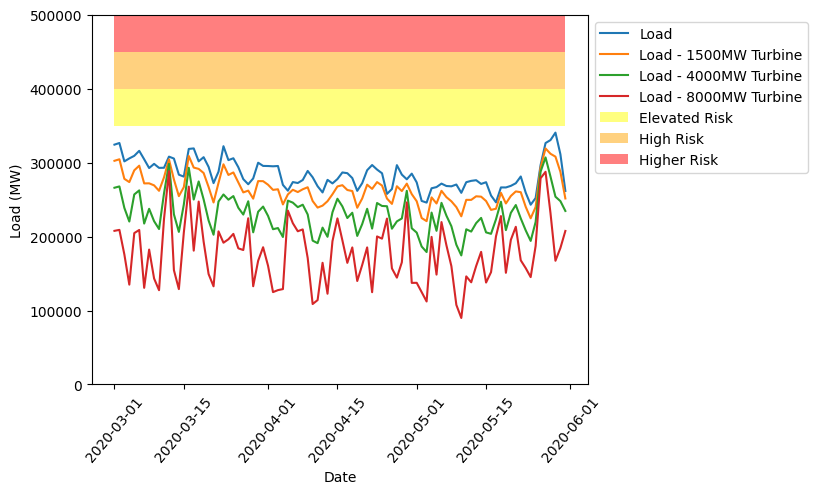

In [ ]:
#Step 1: Import matplotlib as the plotting tool to use!
import matplotlib.pyplot as plt

#Step 2: Define a figure and axis.
fig, ax = plt.subplots()

#Step 3: Plot the data! Here we have the date on the x axis, with load on the y-axis.
ax.plot(analysis_data['Date'], analysis_data['Load'], label = 'Load')
ax.plot(analysis_data['Date'], analysis_data['Load - 1500MW Turbine'], label = 'Load - 1500MW Turbine')
ax.plot(analysis_data['Date'], analysis_data['Load - 4000MW Turbine'], label = 'Load - 4000MW Turbine')
ax.plot(analysis_data['Date'], analysis_data['Load - 8000MW Turbine'], label = 'Load - 8000MW Turbine')

#Step 4: Label the both the x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Load (MW)')

#Step 5: Set the x and y axis limits.
ax.set_ylim(ymin=0, ymax=500000)

#Step 6: Rotate the x axis time labels for better fit within the figure.
plt.xticks(rotation=50)

#Step 7: Define the risk regions.
plt.fill_between(analysis_data['Date'], 350000, 400000, color='yellow', alpha=0.5, linewidth = 0.0, label='Elevated Risk')
plt.fill_between(analysis_data['Date'], 400000, 450000, color='orange', alpha=0.5, linewidth = 0.0, label='High Risk')
plt.fill_between(analysis_data['Date'], 450000, 500000, color='red', alpha=0.5, linewidth = 0.0, label='Higher Risk')

#Step 8: Create the legend and show the plot!
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [ ]:
#Step 9.1: Print the number of days with elevated risk
print("Days of Elevated Risk or greater with no turbines: ", analysis_data[(analysis_data["Load"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 1500 MW of turbines: ", analysis_data[(analysis_data["Load - 1500MW Turbine"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 4000 MW of turbines: ", analysis_data[(analysis_data["Load - 4000MW Turbine"] > 350000)].shape[0])
print("Days of Elevated Risk or greater with 8000 MW of turbines: ", analysis_data[(analysis_data["Load - 8000MW Turbine"] > 350000)].shape[0])

Days of Elevated Risk or greater with no turbines:  0
Days of Elevated Risk or greater with 1500 MW of turbines:  0
Days of Elevated Risk or greater with 4000 MW of turbines:  0
Days of Elevated Risk or greater with 8000 MW of turbines:  0


In [ ]:
#Step 9.2: Print the number of days with high risk
print("Days of High Risk or greater with no turbines: ", analysis_data[(analysis_data["Load"] > 400000)].shape[0])
print("Days of High Risk or greater with 1500 MW of turbines: ", analysis_data[(analysis_data["Load - 1500MW Turbine"] > 400000)].shape[0])
print("Days of High Risk or greater with 4000 MW of turbines: ", analysis_data[(analysis_data["Load - 4000MW Turbine"] > 400000)].shape[0])
print("Days of High Risk or greater with 8000 MW of turbines: ", analysis_data[(analysis_data["Load - 8000MW Turbine"] > 400000)].shape[0])

Days of High Risk or greater with no turbines:  0
Days of High Risk or greater with 1500 MW of turbines:  0
Days of High Risk or greater with 4000 MW of turbines:  0
Days of High Risk or greater with 8000 MW of turbines:  0


In [ ]:
#Step 9.3: Print the number of days with higher risk
print("Days of Higher Risk with no turbines: ", analysis_data[analysis_data["Load"] > 450000].shape[0])
print("Days of Higher Risk with 1500 MW of turbines: ", analysis_data[analysis_data["Load - 1500MW Turbine"] > 450000].shape[0])
print("Days of Higher Risk with 4000 MW of turbines: ", analysis_data[analysis_data["Load - 4000MW Turbine"] > 450000].shape[0])
print("Days of Higher Risk with 8000 MW of turbines: ", analysis_data[analysis_data["Load - 8000MW Turbine"] > 450000].shape[0])

Days of Higher Risk with no turbines:  0
Days of Higher Risk with 1500 MW of turbines:  0
Days of Higher Risk with 4000 MW of turbines:  0
Days of Higher Risk with 8000 MW of turbines:  0


**Part 7:** Loop over all potential years to determine average number of days with elevated risk and plot this data!

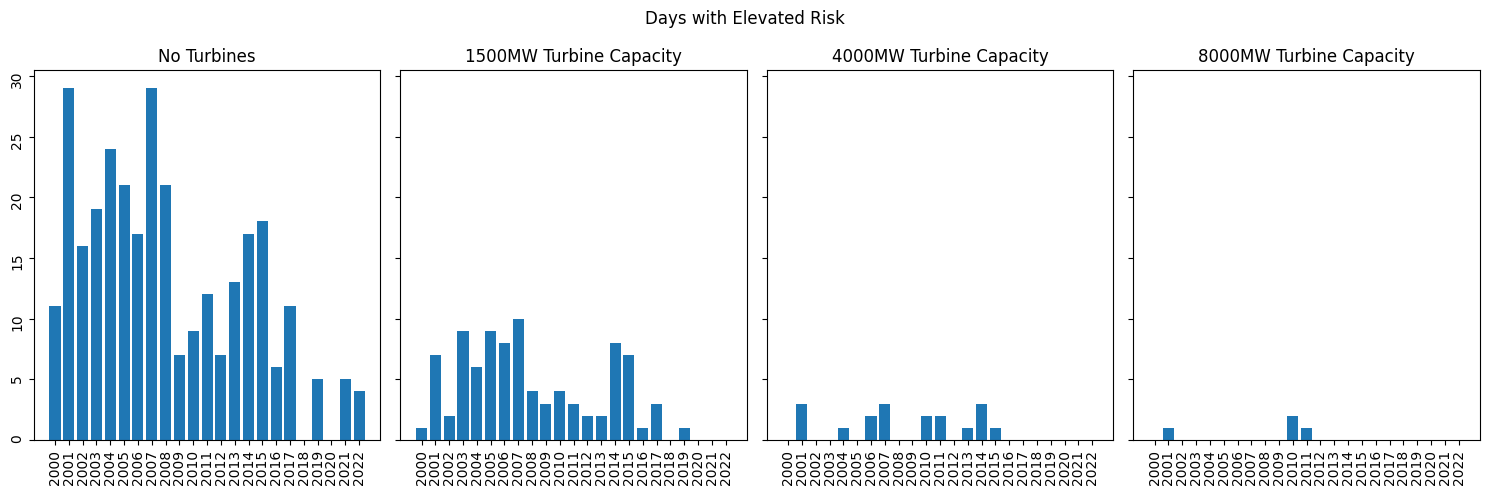

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Step 1: Create a dataframe for the elevated risk data.
elevated_risk = pd.DataFrame(columns=['Year Range', 'No Turbines', '1500MW Turbine Capacity', '4000 MW Turbine Capacity', '8000 MW Turbine Capacity'])

years_min=2000
years_max = 2023

i = years_min
while i < years_max:
  analysis_data = wind_load_data.loc[(wind_load_data['Date'].dt.year == i) & ((wind_load_data['Date'].dt.month == month1) | (wind_load_data['Date'].dt.month == month2)| (wind_load_data['Date'].dt.month == month3))]
  analysis_data['Load - 1500MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 1500)
  analysis_data['Load - 4000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 4000)
  analysis_data['Load - 8000MW Turbine'] = analysis_data['Load'] - (analysis_data['Net CP for Turbines'] * 8000)
  analysis_data = analysis_data.drop(columns = ['Net CP for Turbines'])
  elevated_risk.loc[i - years_min] = [str(i), analysis_data[analysis_data["Load"] > 350000].shape[0], analysis_data[(analysis_data["Load - 1500MW Turbine"] > 350000)].shape[0], analysis_data[(analysis_data["Load - 4000MW Turbine"] > 350000)].shape[0], analysis_data[analysis_data["Load - 8000MW Turbine"] > 350000].shape[0]]
  i+=1


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharey=True)
axes[0].bar(elevated_risk['Year Range'], elevated_risk['No Turbines'], label='Days of Elevated Risk without Turbines')
axes[1].bar(elevated_risk['Year Range'], elevated_risk['1500MW Turbine Capacity'], label='Days of Elevated Risk with 1500MW of Turbine Capacity')
axes[2].bar(elevated_risk['Year Range'], elevated_risk['4000 MW Turbine Capacity'], label='Days of Elevated Risk with 4000MW of Turbine Capacity')
axes[3].bar(elevated_risk['Year Range'], elevated_risk['8000 MW Turbine Capacity'], label='Days of Elevated Risk with 8000MW of Turbine Capacity')

axes[0].tick_params(labelrotation=90)
axes[1].tick_params(labelrotation=90)
axes[2].tick_params(labelrotation=90)
axes[3].tick_params(labelrotation=90)

plt.suptitle("Days with Elevated Risk")
axes[0].set_title('No Turbines')
axes[1].set_title('1500MW Turbine Capacity')
axes[2].set_title('4000MW Turbine Capacity')
axes[3].set_title('8000MW Turbine Capacity')

plt.tight_layout()
plt.show()